In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from fun_lib import *

In [2]:
bp = 7.28
m, n = 5,20
T = 0*np.pi/180
delta = 0*np.pi/180
c_r, c_t = 1,.6
U_i = 100
rho = 1.0
dt = 0.1
alpha = 5*np.pi/180

In [3]:
X,PC = wing_panels(bp, T, delta, c_r, c_t, m, n)
XV = steady_wing_vortex_panels(X,U_i,alpha)

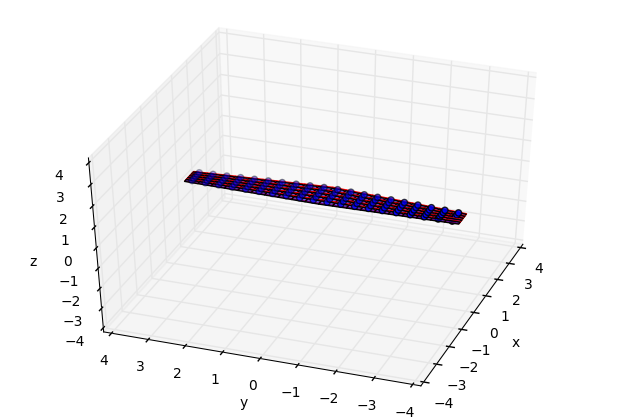

In [4]:
ax = plot_panels(X,transp=0.5,elev=40,azim=-160)
plot_panels(XV,ax=ax,edge_color='r',fill_color=0)
plot_control_points(PC,ax);

In [5]:
net_g = net_panel_circulation(X,PC,U_i,alpha)

In [6]:
dL = net_g*rho*U_i*bp/n
S = wing_planform_surface(X)
dp = dL/S
cl = dp/(0.5*rho*U_i**2)

In [7]:
CLw = dL.sum()/(0.5*rho*U_i**2*S.sum())
CLw

0.58093279838146161

In [8]:
cl_span = cl.sum(axis=0)/m

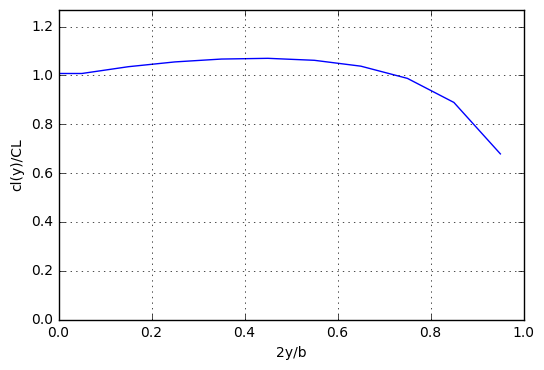

In [9]:
plt.plot(PC[0,:,1]*2/bp,cl_span/CLw)
plt.ylim(0,max(cl_span/CLw) + 0.2)
plt.xlim(0,1)
plt.xlabel('2y/b')
plt.ylabel('cl(y)/CL')
plt.grid();

In [10]:
import mpl_toolkits.mplot3d as a3
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

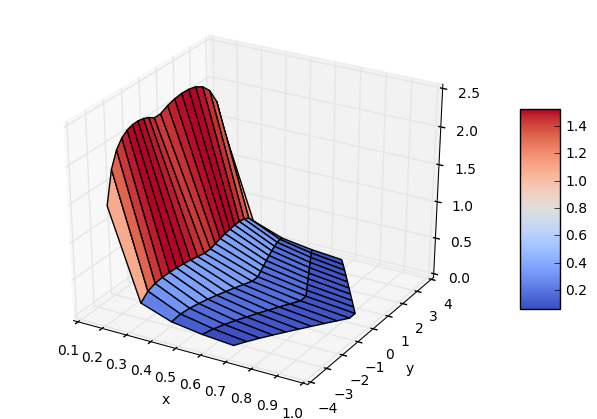

In [11]:
fig = plt.figure()
ax = a3.Axes3D(fig)
surf = ax.plot_surface(PC[:,:,0],PC[:,:,1],cl,cmap=cm.coolwarm,
                       antialiased=True,shade=False,
                       cstride=1, rstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(surf, shrink=0.5, aspect=5);